In [31]:
 #@title
# Step 1: Import necessary libraries
import pandas as pd
#from google.colab import files

# Step 2: Upload the file from local filesystem

# The uploaded file will be stored in the current working directory
# Retrieve the filename from the upload dictionary
import io


# Step 3: Read the CSV file into a DataFrame
df = pd.read_csv('redfin_rent_ag_inactive_leads.csv')



/var/folders/wm/b9_35x7x4wn97kg72_dj2zyc0000gp/T/ipykernel_90911/4158017397.py:14: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('redfin_rent_ag_inactive_leads.csv')


Properties with 0 leads:				7817
Total unique inactve MF Availble Properties:		15278
Percent Properties with 0 leads:			51.17%
--------------------
Rent Properties with 0 leads:				9352
Rent Total unique inactve MF Availble Properties:	13520
Rent Percent Properties with 0 leads:			69.17%
--------------------
AG Properties with 0 leads:				12106
AG Total unique inactve MF Availble Properties:		13237
AG Percent Properties with 0 leads:			91.46%
--------------------
Redfin Properties with 0 leads:				7785
Redfin Total unique inactve MF Availble Properties:	12678
Redfin Percent Properties with 0 leads:			61.41%


/var/folders/wm/b9_35x7x4wn97kg72_dj2zyc0000gp/T/ipykernel_90911/3390265921.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Source', y='Percentage', data=df_plot, palette='viridis', edgecolor='black')


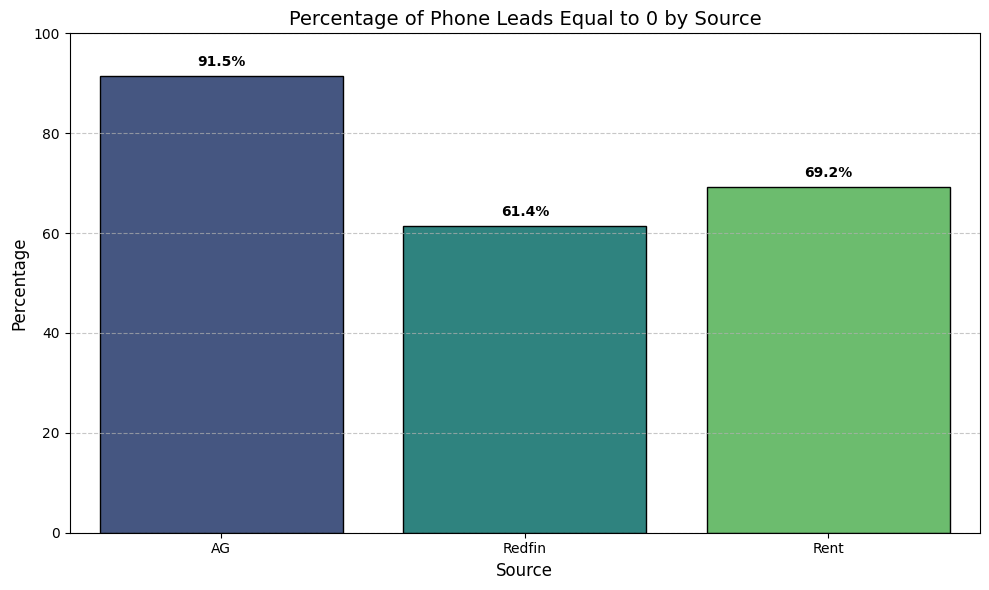

In [32]:
# @title
grouped = df.groupby(['PropertyName']).agg({'pageviews': 'sum', 'email_leads': 'sum', 'phone_leads': 'sum'})
site_grouped = df.groupby(['site','propertyid', 'listingid']).agg({'pageviews': 'sum', 'email_leads': 'sum', 'phone_leads': 'sum'})
# @title
rent_df = site_grouped.xs('Rent', level='site')
ag_df = site_grouped.xs('AG', level='site')
redfin_df= site_grouped.xs('Redfin', level='site')

# @title
print('Properties with 0 leads:\t\t\t\t{}'.format(len(grouped[grouped['phone_leads'] == 0])))
print('Total unique inactve MF Availble Properties:\t\t{}'.format(len(grouped)))
print('Percent Properties with 0 leads:\t\t\t{:.02f}%'.format((len(grouped[grouped['phone_leads'] == 0] ) / len(grouped)) * 100 ))

print('-'*20)
print('Rent Properties with 0 leads:\t\t\t\t{}'.format(len(rent_df[rent_df['phone_leads'] == 0])))
print('Rent Total unique inactve MF Availble Properties:\t{}'.format(len(rent_df)))
print('Rent Percent Properties with 0 leads:\t\t\t{:.02f}%'.format((len(rent_df[rent_df['phone_leads'] == 0] ) / len(rent_df)) * 100 ))

print('-'*20)
print('AG Properties with 0 leads:\t\t\t\t{}'.format(len(ag_df[ag_df['phone_leads'] == 0])))
print('AG Total unique inactve MF Availble Properties:\t\t{}'.format(len(ag_df)))
print('AG Percent Properties with 0 leads:\t\t\t{:.02f}%'.format((len(ag_df[ag_df['phone_leads'] == 0] ) / len(ag_df)) * 100 ))

print('-'*20)
print('Redfin Properties with 0 leads:\t\t\t\t{}'.format(len(redfin_df[redfin_df['phone_leads'] == 0])))
print('Redfin Total unique inactve MF Availble Properties:\t{}'.format(len(redfin_df)))
print('Redfin Percent Properties with 0 leads:\t\t\t{:.02f}%'.format((len(redfin_df[redfin_df['phone_leads'] == 0] ) / len(redfin_df)) * 100 ))
data = {
    'Source': ['AG', 'Redfin', 'Rent'],
    'Percentage': [(len(ag_df[ag_df['phone_leads'] == 0] ) / len(ag_df)) * 100 , (len(redfin_df[redfin_df['phone_leads'] == 0] ) / len(redfin_df)) * 100, (len(rent_df[rent_df['phone_leads'] == 0] ) / len(rent_df)) * 100 ]
}
df_plot = pd.DataFrame(data)
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the plot
plt.figure(figsize=(10, 6))

# Create the bar plot with enhanced styling
bar_plot = sns.barplot(x='Source', y='Percentage', data=df_plot, palette='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Source', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Phone Leads Equal to 0 by Source', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limit to make sure the percentage labels fit

# Add percentage labels on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0, 10),  # 10 points vertical offset
                      textcoords='offset points',
                      fontsize=10,
                      color='black',
                      weight='bold')

# Improve the appearance with grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
#14k 
(df['phone_leads'].sum()) / 2

13197.5

In [10]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 728.8 kB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


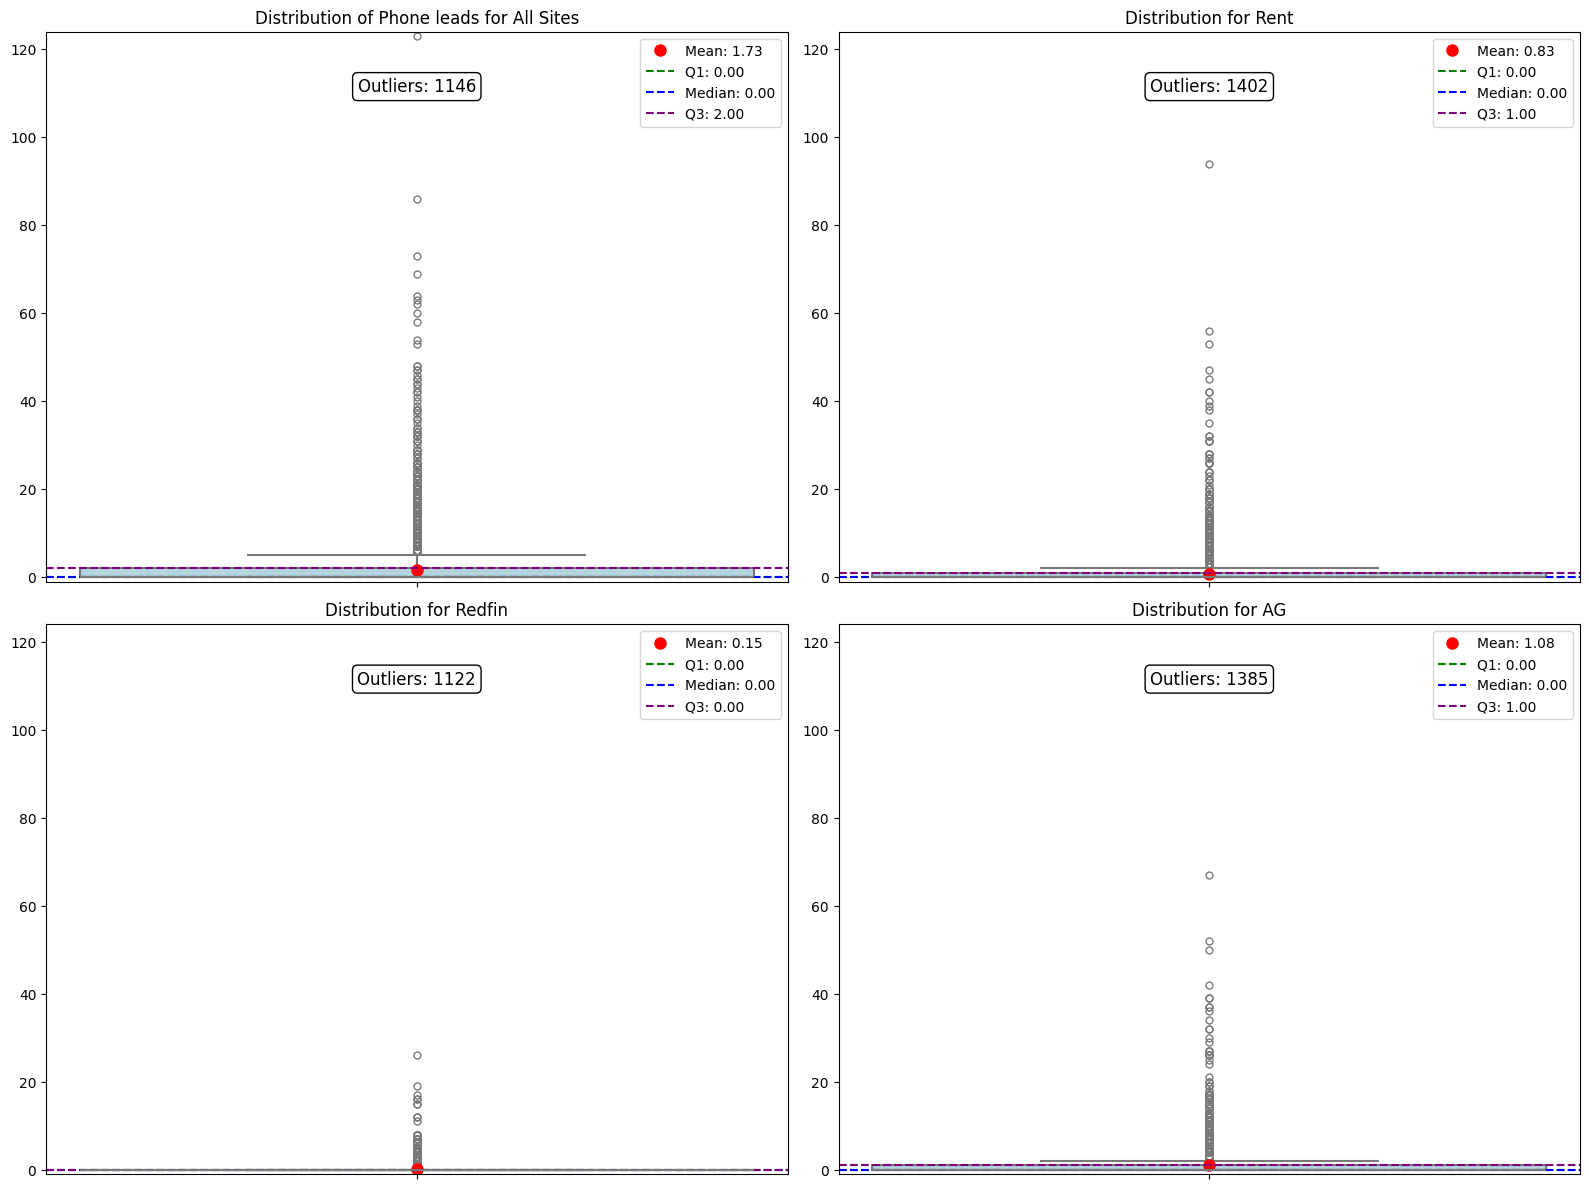

In [34]:
# @title
titles = ['Distribution of Phone leads for All Sites', 'Distribution for Rent', 'Distribution for Redfin', 'Distribution for AG']
# Determine the common y-axis limits
df1_agg = df.groupby('PropertyName')['phone_leads'].sum().reset_index()
df2_agg = df[df['site'] == 'Rent'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df3_agg = df[df['site'] == 'AG'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df4_agg = df[df['site'] == 'Redfin'].groupby('PropertyName')['phone_leads'].sum().reset_index()
dataframes = [df1_agg, df2_agg, df3_agg, df4_agg]

# Determine common y-axis limits
all_values = pd.concat([df1['phone_leads'] for df1 in dataframes])
ymin, ymax = all_values.min() - 1, all_values.max() + 1  # Add some padding for better visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)  # 2 rows, 2 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a box-and-whisker plot for each aggregated DataFrame
for ax, df1, title in zip(axes, dataframes, titles):
    # Create the boxplot
    sns.boxplot(y=df1['phone_leads'], ax=ax, color='lightblue', fliersize=5, linewidth=1.5, width=0.5)

    # Calculate quartiles and mean
    Q1 = df1['phone_leads'].quantile(0.25)
    median = df1['phone_leads'].median()
    Q3 = df1['phone_leads'].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df1['phone_leads'][(df1['phone_leads'] < lower_whisker) | (df1['phone_leads'] > upper_whisker)]
    num_outliers = len(outliers)

    # Plot the mean value
    mean_value = df1['phone_leads'].mean()
    ax.plot([0], [mean_value], 'ro', label=f'Mean: {mean_value:.2f}', markersize=8)

    # Add lines for quartiles and whiskers
    ax.axhline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
    ax.axhline(median, color='blue', linestyle='--', label=f'Median: {median:.2f}')
    ax.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

    # Annotate the plot with the number of outliers
    ax.annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.9), xycoords='axes fraction',
                ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    # Set the title and other attributes
    ax.set_title(title)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()  # Show legend to display the mean and quartile labels
    ax.set_ylim(ymin, ymax)  # Set the same y-axis limits for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [35]:
# @title
import pandas as pd
import numpy as np
from scipy import stats

# Define methods to find outliers and calculate contributions
def find_outliers_iqr(df2, column_name):
    Q1 = df2[column_name].quantile(0.25)
    Q3 = df2[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column_name] < lower_bound) | (df2[column_name] > upper_bound)]
    return outliers

def calculate_outlier_contribution(df2, column_name):
    outliers = find_outliers_iqr(df2, column_name)
    total = df2[column_name].sum()
    outliers_total = outliers[column_name].sum()
    contribution_percentage = (outliers_total / total) * 100
    return outliers, contribution_percentage

def find_outliers_zscore(df2, column_name):
    z_scores = stats.zscore(df2[column_name])
    abs_z_scores = np.abs(z_scores)
    outliers = df2[abs_z_scores > 3]  # Common threshold for z-score
    return outliers

def calculate_outlier_contribution_zscore(df2, column_name):
    outliers = find_outliers_zscore(df2, column_name)
    total = df2[column_name].sum()
    outliers_total = outliers[column_name].sum()
    contribution_percentage = (outliers_total / total) * 100
    return outliers, contribution_percentage

# Apply to each DataFrame
dfs = [df1_agg, df2_agg, df3_agg, df4_agg]
titles = ['All', "Rent", 'AG', "Redfin"]
results = {}

for i, df1 in enumerate(dfs, start=0):
    # Using IQR
    outliers_iqr, contribution_iqr = calculate_outlier_contribution(df1, 'phone_leads')
    results[f'{titles[i]}_iqr'] = {
        'outliers': outliers_iqr,
        'contribution_percentage': contribution_iqr
    }

    # Using Z-Score
    outliers_zscore, contribution_zscore = calculate_outlier_contribution_zscore(df1, 'phone_leads')
    results[f'{titles[i]}_zscore'] = {
        'outliers': outliers_zscore,
        'contribution_percentage': contribution_zscore
    }

# Print results
j= 1
for key, value in results.items():
    print(f"{key}:")
    print(f"Outliers Contribution Percentage: {value['contribution_percentage']:.2f}%")
    print()
    if j % 2 == 0:
      print('-'*40)
    j+=1
print('The above shows that, while using median as a basis, the outliers take up >50% of all the leads accounted for.')
print('While using zscore as a basis,  the top .3% of properties account for >20% leads.')

All_iqr:
Outliers Contribution Percentage: 50.03%

All_zscore:
Outliers Contribution Percentage: 22.41%

----------------------------------------
Rent_iqr:
Outliers Contribution Percentage: 67.11%

Rent_zscore:
Outliers Contribution Percentage: 25.40%

----------------------------------------
AG_iqr:
Outliers Contribution Percentage: 100.00%

AG_zscore:
Outliers Contribution Percentage: 40.28%

----------------------------------------
Redfin_iqr:
Outliers Contribution Percentage: 64.17%

Redfin_zscore:
Outliers Contribution Percentage: 22.20%

----------------------------------------
The above shows that, while using median as a basis, the outliers take up >50% of all the leads accounted for.
While using zscore as a basis,  the top .3% of properties account for >20% leads.


In [36]:
dfs = [df1_agg, df2_agg, df3_agg, df4_agg]
titles = ['All', "Rent", 'AG', "Redfin"]

greater_than_equal = 1.8

for i, df1 in enumerate(dfs):
  counts = len(df1[df1['phone_leads'] >= greater_than_equal])
  lead_total_greater_than = df1[df1['phone_leads'] >= greater_than_equal]['phone_leads'].sum()
  total_all_leads = df1['phone_leads'].sum()
  print('Count of properties with > 1.8 Leads in {}:\t\t\t{} ----- Making up {:.02f}% of properties'.format(titles[i],counts, counts/len(df1)*100 ))
  print('Total leads for properties with > 1.8 Leads in {}:\t\t{} ----- Making up {:.02f}% of properties'.format(titles[i],lead_total_greater_than, lead_total_greater_than/total_all_leads*100 ))


    # we chose a 27 day period

greater_than_equal = 1.8
mean_data_frames = [data_mean['phone_leads'].apply(lambda x: x/27) for data_mean in dfs]
for j, frame in enumerate(mean_data_frames):
  counts = len(frame[frame >= greater_than_equal])
  print('Count of properties with > 1.8 Leads in {}:\t\t{} ----- Making up {:.02f}% of properties'.format(titles[j],counts, counts/len(df1)*100 ))

Count of properties with > 1.8 Leads in All:			4697 ----- Making up 30.74% of properties
Total leads for properties with > 1.8 Leads in All:		23631 ----- Making up 89.53% of properties
Count of properties with > 1.8 Leads in Rent:			2403 ----- Making up 16.29% of properties
Total leads for properties with > 1.8 Leads in Rent:		10263 ----- Making up 83.38% of properties
Count of properties with > 1.8 Leads in AG:			384 ----- Making up 3.01% of properties
Total leads for properties with > 1.8 Leads in AG:		1228 ----- Making up 62.46% of properties
Count of properties with > 1.8 Leads in Redfin:			2407 ----- Making up 21.51% of properties
Total leads for properties with > 1.8 Leads in Redfin:		9821 ----- Making up 81.03% of properties
Count of properties with > 1.8 Leads in All:		11 ----- Making up 0.10% of properties
Count of properties with > 1.8 Leads in Rent:		3 ----- Making up 0.03% of properties
Count of properties with > 1.8 Leads in AG:		0 ----- Making up 0.00% of properties
Count

In [6]:
used_df = df[df['phone_leads'] !=0]

In [37]:
titles = ['Distribution of Phone leads >0 for All Sites', 'Distribution >0 for Rent', 'Distribution >0 for Redfin', 'Distribution >0 for AG']
# Determine the common y-axis limits
df1_agg = df.groupby('PropertyName')['phone_leads'].sum().reset_index()
df2_agg = used_df[used_df['site'] == 'Rent'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df3_agg = used_df[used_df['site'] == 'AG'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df4_agg = used_df[used_df['site'] == 'Redfin'].groupby('PropertyName')['phone_leads'].sum().reset_index()
dataframes = [df1_agg, df2_agg, df3_agg, df4_agg]

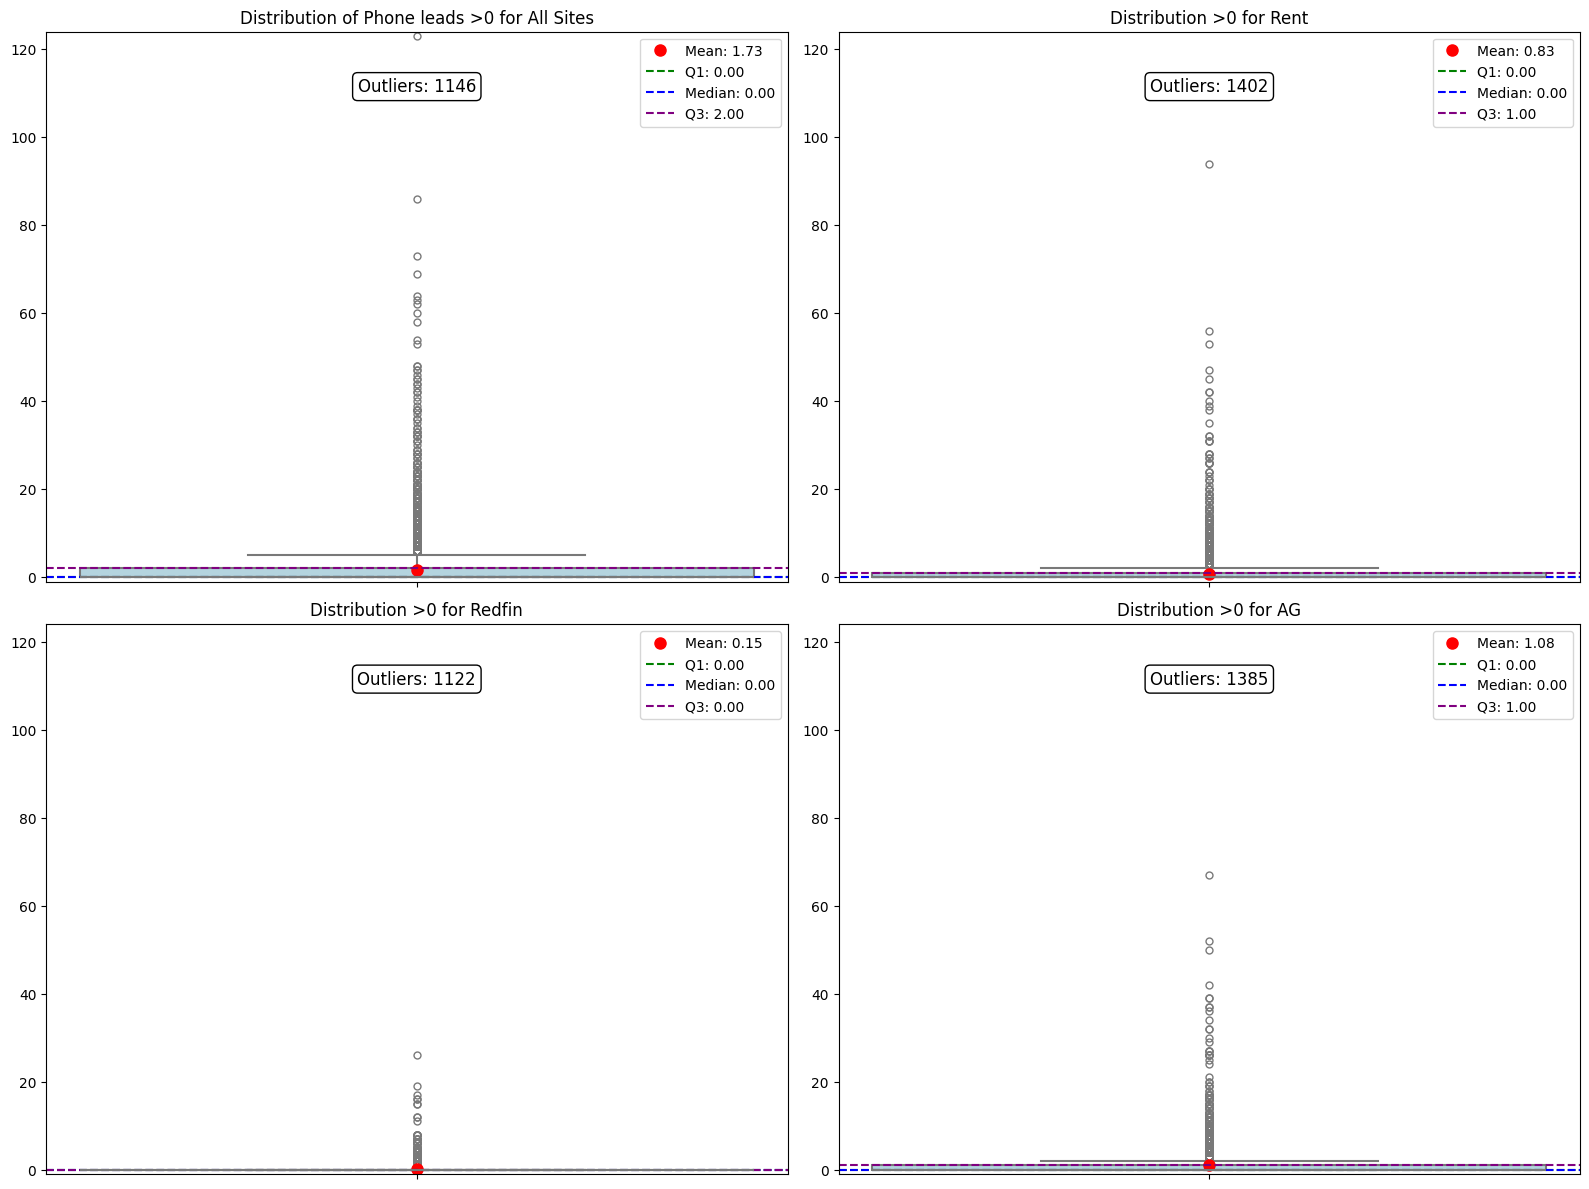

In [69]:
# @title
titles = ['Distribution of Phone leads >0 for All Sites', 'Distribution >0 for Rent', 'Distribution >0 for Redfin', 'Distribution >0 for AG']
# Determine the common y-axis limits


# Determine common y-axis limits
all_values = pd.concat([df1['phone_leads'] for df1 in dataframes])
ymin, ymax = all_values.min() - 1, all_values.max() + 1  # Add some padding for better visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)  # 2 rows, 2 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a box-and-whisker plot for each aggregated DataFrame
for ax, df1, title in zip(axes, dataframes, titles):
    # Create the boxplot
    sns.boxplot(y=df1['phone_leads'], ax=ax, color='lightblue', fliersize=5, linewidth=1.5, width=0.5)

    # Calculate quartiles and mean
    Q1 = df1['phone_leads'].quantile(0.25)
    median = df1['phone_leads'].median()
    Q3 = df1['phone_leads'].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df1['phone_leads'][(df1['phone_leads'] < lower_whisker) | (df1['phone_leads'] > upper_whisker)]
    num_outliers = len(outliers)

    # Plot the mean value
    mean_value = df1['phone_leads'].mean()
    ax.plot([0], [mean_value], 'ro', label=f'Mean: {mean_value:.2f}', markersize=8)

    # Add lines for quartiles and whiskers
    ax.axhline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
    ax.axhline(median, color='blue', linestyle='--', label=f'Median: {median:.2f}')
    ax.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

    # Annotate the plot with the number of outliers
    ax.annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.9), xycoords='axes fraction',
                ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    # Set the title and other attributes
    ax.set_title(title)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()  # Show legend to display the mean and quartile labels
    ax.set_ylim(ymin, ymax)  # Set the same y-axis limits for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [70]:
# @title
import pandas as pd
import numpy as np
from scipy import stats

# Define methods to find outliers and calculate contributions
def find_outliers_iqr(df2, column_name):
    Q1 = df2[column_name].quantile(0.25)
    Q3 = df2[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column_name] < lower_bound) | (df2[column_name] > upper_bound)]
    return outliers

def calculate_outlier_contribution(df2, column_name):
    outliers = find_outliers_iqr(df2, column_name)
    total = df2[column_name].sum()
    outliers_total = outliers[column_name].sum()
    contribution_percentage = (outliers_total / total) * 100
    return outliers, contribution_percentage

def find_outliers_zscore(df2, column_name):
    z_scores = stats.zscore(df2[column_name])
    abs_z_scores = np.abs(z_scores)
    outliers = df2[abs_z_scores > 3]  # Common threshold for z-score
    return outliers

def calculate_outlier_contribution_zscore(df2, column_name):
    outliers = find_outliers_zscore(df2, column_name)
    total = df2[column_name].sum()
    outliers_total = outliers[column_name].sum()
    contribution_percentage = (outliers_total / total) * 100
    return outliers, contribution_percentage

# Apply to each DataFrame
dfs = [df1_agg, df2_agg, df3_agg, df4_agg]
titles = ['All', "Rent", 'AG', "Redfin"]
results = {}

for i, df1 in enumerate(dfs, start=0):
    # Using IQR
    outliers_iqr, contribution_iqr = calculate_outlier_contribution(df1, 'phone_leads')
    results[f'{titles[i]}_iqr'] = {
        'outliers': outliers_iqr,
        'contribution_percentage': contribution_iqr
    }

    # Using Z-Score
    outliers_zscore, contribution_zscore = calculate_outlier_contribution_zscore(df1, 'phone_leads')
    results[f'{titles[i]}_zscore'] = {
        'outliers': outliers_zscore,
        'contribution_percentage': contribution_zscore
    }

# Print results
j= 1
for key, value in results.items():
    print(f"{key}:")
    print(f"Outliers Contribution Percentage: {value['contribution_percentage']:.2f}%")
    print()
    if j % 2 == 0:
      print('-'*40)
    j+=1
print('The above shows that, while using median as a basis, the outliers take up >50% of all the leads accounted for.')
print('While using zscore as a basis,  the top .3% of properties account for >20% leads.')

All_iqr:
Outliers Contribution Percentage: 50.03%

All_zscore:
Outliers Contribution Percentage: 22.41%

----------------------------------------
Rent_iqr:
Outliers Contribution Percentage: 33.36%

Rent_zscore:
Outliers Contribution Percentage: 13.92%

----------------------------------------
AG_iqr:
Outliers Contribution Percentage: 28.08%

AG_zscore:
Outliers Contribution Percentage: 10.94%

----------------------------------------
Redfin_iqr:
Outliers Contribution Percentage: 29.29%

Redfin_zscore:
Outliers Contribution Percentage: 14.21%

----------------------------------------
The above shows that, while using median as a basis, the outliers take up >50% of all the leads accounted for.
While using zscore as a basis,  the top .3% of properties account for >20% leads.


In [29]:
dfs = [df1_agg, df2_agg, df3_agg, df4_agg]
titles = ['All', "Rent", 'AG', "Redfin"]

greater_than_equal = 1.8

for i, df1 in enumerate(dfs):
  counts = len(df1[df1['phone_leads'] >= greater_than_equal])
  lead_total_greater_than = df1[df1['phone_leads'] >= greater_than_equal]['phone_leads'].sum()
  total_all_leads = df1['phone_leads'].sum()
  print('Count of properties with > 1.8 Leads in {}:\t\t\t{} ----- Making up {:.02f}% of properties'.format(titles[i],counts, counts/len(df1)*100 ))
  print('Total leads for properties with > 1.8 Leads in {}:\t\t{} ----- Making up {:.02f}% of properties'.format(titles[i],lead_total_greater_than, lead_total_greater_than/total_all_leads*100 ))

Count of properties with > 1.8 Leads in All:			4697 ----- Making up 30.74% of properties
Total leads for properties with > 1.8 Leads in All:		23631 ----- Making up 89.53% of properties
Count of properties with > 1.8 Leads in Rent:			2403 ----- Making up 54.01% of properties
Total leads for properties with > 1.8 Leads in Rent:		10263 ----- Making up 83.38% of properties
Count of properties with > 1.8 Leads in AG:			384 ----- Making up 34.22% of properties
Total leads for properties with > 1.8 Leads in AG:		1228 ----- Making up 62.46% of properties
Count of properties with > 1.8 Leads in Redfin:			2407 ----- Making up 51.15% of properties
Total leads for properties with > 1.8 Leads in Redfin:		9821 ----- Making up 81.03% of properties


In [30]:
# we chose a 27 day period

greater_than_equal = 1.8
mean_data_frames = [data_mean['phone_leads'].apply(lambda x: x/27) for data_mean in dfs]
for j, frame in enumerate(mean_data_frames):
  counts = len(frame[frame >= greater_than_equal])
  print('Count of properties with > 1.8 Leads in {}:\t\t{} ----- Making up {:.02f}% of properties'.format(titles[j],counts, counts/len(df1)*100 ))

Count of properties with > 1.8 Leads in All:		11 ----- Making up 0.23% of properties
Count of properties with > 1.8 Leads in Rent:		3 ----- Making up 0.06% of properties
Count of properties with > 1.8 Leads in AG:		0 ----- Making up 0.00% of properties
Count of properties with > 1.8 Leads in Redfin:		3 ----- Making up 0.06% of properties


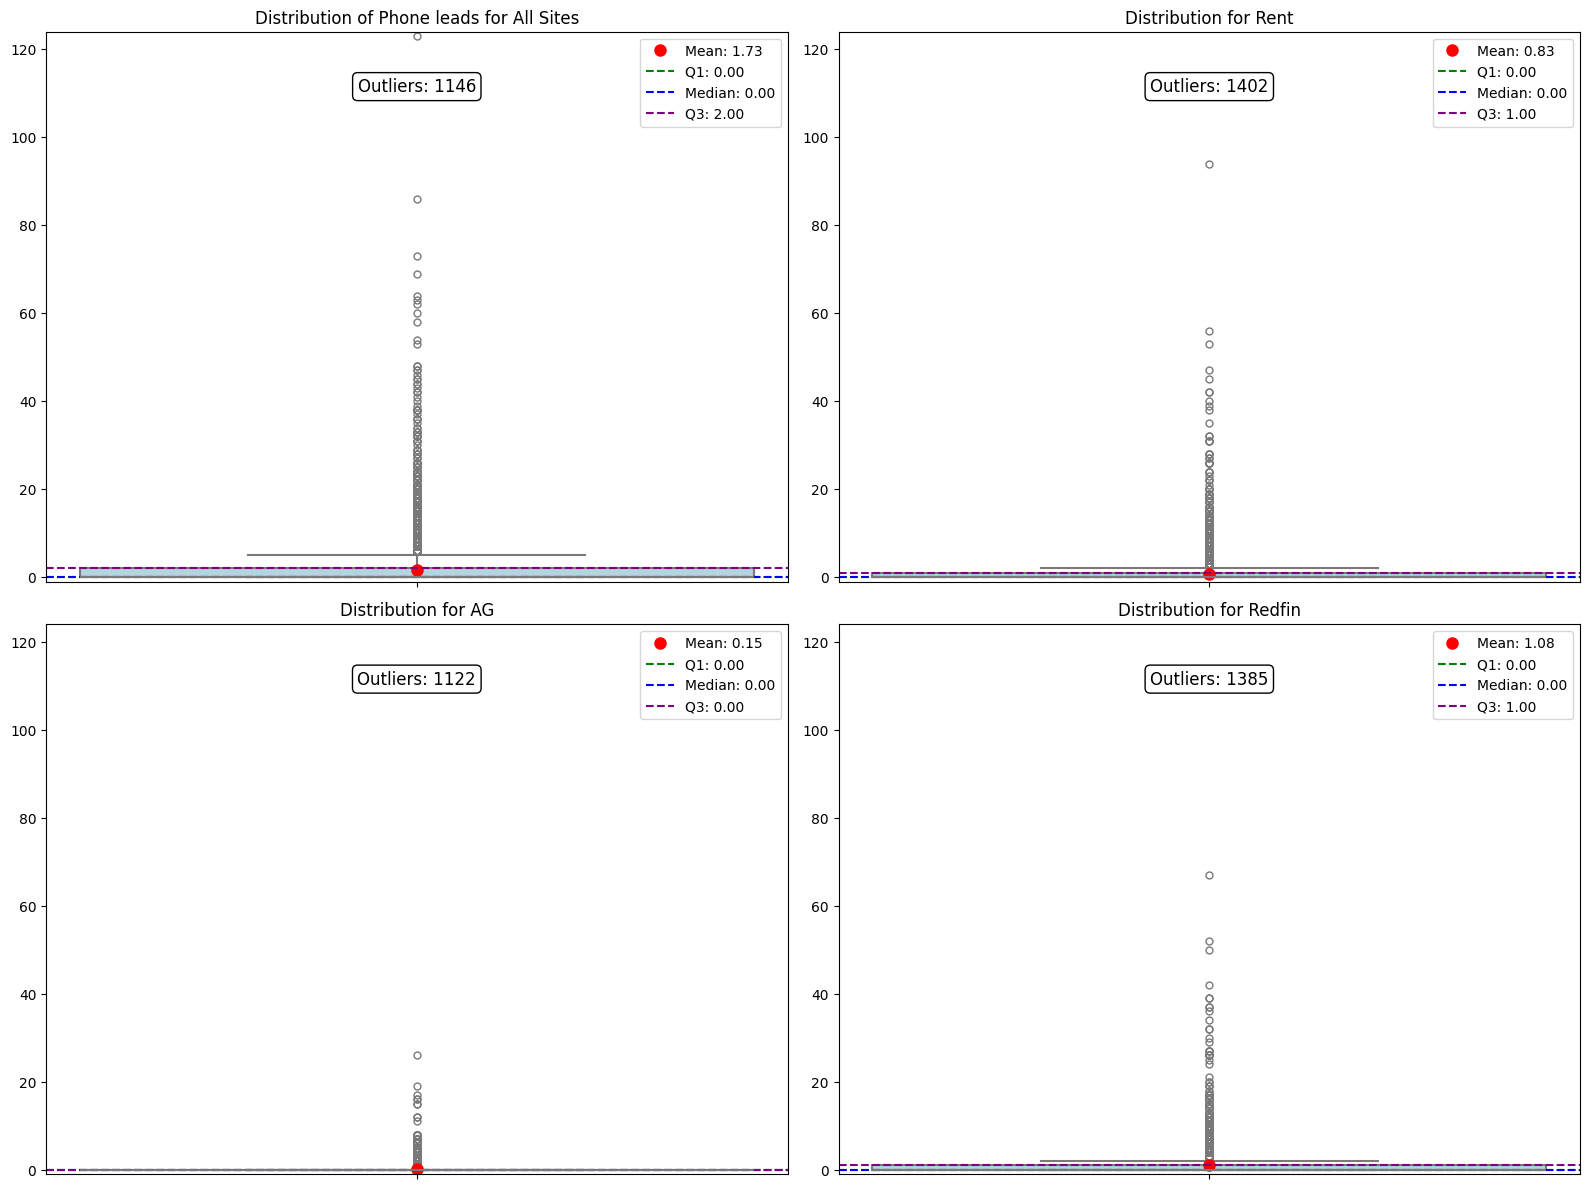

In [41]:
# @title
titles = ['Distribution of Phone leads for All Sites', 'Distribution for Rent', 'Distribution for AG', 'Distribution for Redfin']
# Determine the common y-axis limits
used_df = df 
df1_agg_0 = df.groupby('PropertyName')['phone_leads'].sum().reset_index()
df2_agg_0 = used_df[used_df['site'] == 'Rent'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df3_agg_0 = used_df[used_df['site'] == 'AG'].groupby('PropertyName')['phone_leads'].sum().reset_index()
df4_agg_0 = used_df[used_df['site'] == 'Redfin'].groupby('PropertyName')['phone_leads'].sum().reset_index()
dataframes = [df1_agg_0, df2_agg_0, df3_agg_0, df4_agg_0]
# Determine common y-axis limits
all_values = pd.concat([df1['phone_leads'] for df1 in dataframes])
ymin, ymax = all_values.min() - 1, all_values.max() + 1  # Add some padding for better visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=False)  # 2 rows, 2 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a box-and-whisker plot for each aggregated DataFrame
for ax, df1, title in zip(axes, dataframes, titles):
    # Create the boxplot
    sns.boxplot(y=df1['phone_leads'], ax=ax, color='lightblue', fliersize=5, linewidth=1.5, width=0.5)

    # Calculate quartiles and mean
    Q1 = df1['phone_leads'].quantile(0.25)
    median = df1['phone_leads'].median()
    Q3 = df1['phone_leads'].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df1['phone_leads'][(df1['phone_leads'] < lower_whisker) | (df1['phone_leads'] > upper_whisker)]
    num_outliers = len(outliers)

    # Plot the mean value
    mean_value = df1['phone_leads'].mean()
    ax.plot([0], [mean_value], 'ro', label=f'Mean: {mean_value:.2f}', markersize=8)

    # Add lines for quartiles and whiskers
    ax.axhline(Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
    ax.axhline(median, color='blue', linestyle='--', label=f'Median: {median:.2f}')
    ax.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

    # Annotate the plot with the number of outliers
    ax.annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.9), xycoords='axes fraction',
                ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

    # Set the title and other attributes
    ax.set_title(title)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()  # Show legend to display the mean and quartile labels
    ax.set_ylim(ymin, ymax)  # Set the same y-axis limits for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [42]:
# @title
dfs = [df1_agg_0, df2_agg_0, df3_agg_0, df4_agg_0]
titles = ['All', "Rent", 'AG', "Redfin"]

greater_than_equal = 1.8

for i, df1 in enumerate(dfs):
  counts = len(df1[df1['phone_leads'] >= greater_than_equal])
  lead_total_greater_than = df1[df1['phone_leads'] >= greater_than_equal]['phone_leads'].sum()
  total_all_leads = df1['phone_leads'].sum()
  if i % 1 == 0 : 
    print ('-'*40)
  print('Count of properties with > 1.8 Leads in {}:\t\t\t{} ----- Making up {:.02f}% of properties'.format(titles[i],counts, counts/len(df1)*100 ))
  print('Total leads for properties with > 1.8 Leads in {}:\t\t{} ----- Making up {:.02f}% of leads'.format(titles[i],lead_total_greater_than, lead_total_greater_than/total_all_leads*100 ))

----------------------------------------
Count of properties with > 1.8 Leads in All:			4697 ----- Making up 30.74% of properties
Total leads for properties with > 1.8 Leads in All:		23631 ----- Making up 89.53% of leads
----------------------------------------
Count of properties with > 1.8 Leads in Rent:			2403 ----- Making up 16.29% of properties
Total leads for properties with > 1.8 Leads in Rent:		10263 ----- Making up 83.38% of leads
----------------------------------------
Count of properties with > 1.8 Leads in AG:			384 ----- Making up 3.01% of properties
Total leads for properties with > 1.8 Leads in AG:		1228 ----- Making up 62.46% of leads
----------------------------------------
Count of properties with > 1.8 Leads in Redfin:			2407 ----- Making up 21.51% of properties
Total leads for properties with > 1.8 Leads in Redfin:		9821 ----- Making up 81.03% of leads


In [68]:
dfs[1]['phone_leads'].mean()

0.8343953362255966

2.0
                     PropertyName  phone_leads
2               10 W 137th Street            5
9           1000 Grand by Windsor            2
10         1000 Grant at Burnsley            2
25                     102 S 17th            3
28     1026 Washington Apartments            2
...                           ...          ...
15254                eaves Quincy            4
15255             eaves San Dimas            2
15256      eaves San Dimas Canyon            3
15258            eaves San Marcos            3
15259            eaves Union City            5

[3551 rows x 2 columns]
1.0
                     PropertyName  phone_leads
2               10 W 137th Street            2
9           1000 Grand by Windsor            2
26     1026 Washington Apartments            2
40                  1101 N Lawler            2
46             1115 Virginia Lane            2
...                           ...          ...
14681                X Denver 2.0            2
14693                  York

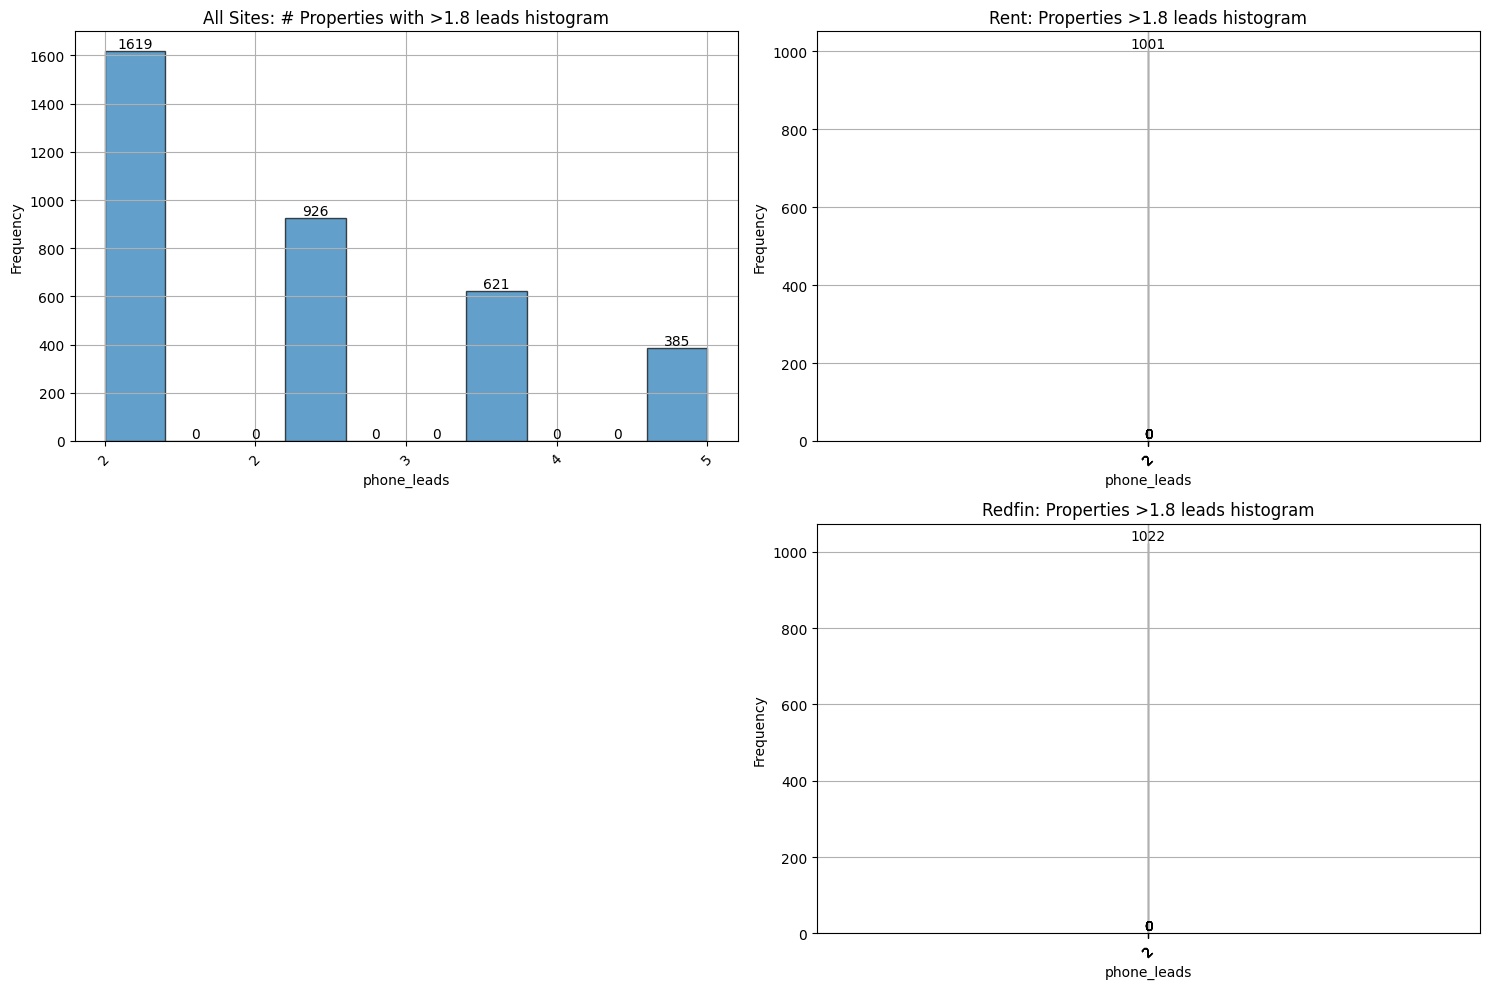

In [59]:
titles = ['All Sites: # Properties with >1.8 leads histogram', 
          'Rent: Properties >1.8 leads histogram', 
          'AG: Properties >1.8 leads histogram', 
          'Redfin: Properties >1.8 leads histogram']

greater_than_equal = 1.8
num_dfs = len(dfs)
num_bins = 10  # Number of bins
num_x_ticks = 5  # Desired number of x-ticks

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2x2 grid to easily index

for i, df1 in enumerate(dfs):
    if i >= 4:  # Only plot up to 4 DataFrames (2x2 grid)
        break

    if 'phone_leads' in df1.columns:
        
        # Remove outliers using the IQR method
        q1 = df1['phone_leads'].quantile(0.25)
        q3 = df1['phone_leads'].quantile(0.75)
        print(q3)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Filter out outliers
        filtered_df = df1[(df1['phone_leads'] >= lower_bound) & (df1['phone_leads'] <= upper_bound)]
        
        # Further filter based on the condition
        filtered_df = filtered_df[filtered_df['phone_leads'] >= greater_than_equal]
        print(filtered_df)
        if not filtered_df.empty:
            # Determine min and max values for the filtered data
            min_value = filtered_df['phone_leads'].min()
            max_value = filtered_df['phone_leads'].max()
            
            # Create bin edges for the current DataFrame
            bins = np.linspace(min_value, max_value, num_bins + 1)
            
            # Plot histogram
            counts, edges, patches = axes[i].hist(filtered_df['phone_leads'], bins=bins, edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{titles[i]}')
            axes[i].set_xlabel('phone_leads')
            axes[i].set_ylabel('Frequency')
            
            # Set x-ticks at the start of the bins
            axes[i].set_xticks(edges)
            axes[i].set_xticklabels([int(edge) for edge in edges], rotation=45)  # Rotate if needed
            
            # Adjust x-ticks to be evenly spaced if necessary
            current_xticks = np.linspace(min_value, max_value, num_x_ticks)
            # Ensure the xticks are within the bin edges range
            current_xticks = [tick for tick in current_xticks if min_value <= tick <= max_value]
            axes[i].set_xticks(current_xticks)
            axes[i].set_xticklabels([int(tick) for tick in current_xticks], rotation=45)
            
            # Annotate bins with counts
            for count, edge in zip(counts, edges[:-1]):  # Use edges[:-1] to align with bin start
                axes[i].text(edge + (bins[1] - bins[0]) / 2, count, int(count), ha='center', va='bottom')
            
            axes[i].grid(True)
        else:
            axes[i].axis('off')  # Hide subplot if no data left after filtering
    else:
        print(f'DataFrame {i+1} does not contain the column "phone_leads".')
        axes[i].axis('off')  # Hide subplot if DataFrame does not contain 'phone_leads'

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()